In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ortho_group
import pandas as pd

rng = np.random.RandomState(8)

In [0]:
original_ = np.array(pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None, index_col=0))
original = np.zeros((original_.shape[0], original_.shape[1]/4))
for i in range(original.shape[0]):
  old_img = original_[i,:].reshape((28, 28))
  new_img = np.zeros((14, 14))
  for x in range(14):
    for y in range(14):
      new_img[x, y] = old_img[2*x, 2*y] + old_img[2*x+1, 2*y] + old_img[2*x, 2*y+1] + old_img[2*x+1, 2*y+1]
      new_img[x, y] = new_img[x, y]/4.0
  original[i,:] = new_img.reshape((196))


N =  20000
d =  196


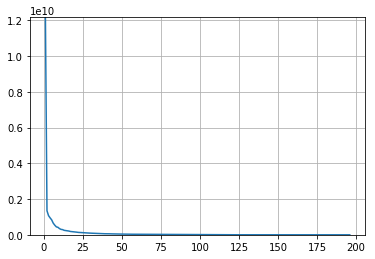

In [0]:
original = original.T


N = original.shape[1]
d = original.shape[0]
print 'N = ', N
print 'd = ', d



E_XX_T = np.dot(original, original.T)


U_star, Sig_star, VT_star = np.linalg.svd(E_XX_T)


x = np.arange(1, len(Sig_star)+1)
plt.plot(x, Sig_star)
plt.grid(which='both')
plt.ylim(-1, np.max(Sig_star)+1)
plt.show()


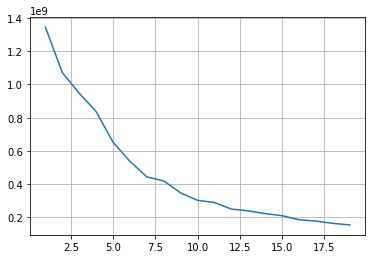

In [0]:
b = np.max(np.linalg.norm(original, axis=1, ord=2))
x = np.arange(1, 20)
plt.plot(x, Sig_star[1:20])
plt.grid(which='both')
#plt.ylim(-1, np.max(Sig_star)+1)
plt.show()


In [0]:
def weighted_cov_sum(original, n, m, N, d, rng, k, n_vects):
    #print 'calling weighted_cov_sum'
    UU_T = np.zeros((d,d))
    UU_T_weighted = np.zeros((d, d))
    UU_T_weighted_ = np.zeros((d, d))
    for i in range(m):
        inds = rng.choice(np.arange(N), n, replace=True)
        A_i = original[:, inds]
        X_i = np.dot(A_i, A_i.T)/n
        U_i, Sig_i, VT_i = np.linalg.svd(X_i)
        UU_T += np.dot(U_i[:, :k], U_i[:, :k].T)
        UU_T_weighted += np.dot(U_i[:, :k], np.dot(np.diag(Sig_i[:k]), U_i[:, :k].T))        
        UU_T_weighted_ += np.dot(U_i[:, :n_vects], np.dot(np.diag(Sig_i[:n_vects]), U_i[:, :n_vects].T))
    #print 'done with function'
    return UU_T/float(m),UU_T_weighted/float(m), UU_T_weighted_/float(m)

# of vectors:  15
n_list:  [  100   136   184   249   336   455   616   834  1129  1529  2070  2802
  3793  5135  6952  9413 12743 17253 23358 31623]

n =  100  done.
err =  0.2937143996068714 , std =  0.053727846483543305
err_weighted =  0.27617878955928044 , std_weighted =  0.05298118882044142
err_weighted_ =  0.21063133078455656 , std_weighted_ =  0.03644021568948629

n =  136  done.
err =  0.2762739114058855 , std =  0.059636931187762914
err_weighted =  0.26339455654491983 , std_weighted =  0.06255990435784989
err_weighted_ =  0.1793945881444849 , std_weighted_ =  0.03219559991484686

n =  184  done.
err =  0.24941073360550625 , std =  0.04899546636618866
err_weighted =  0.23648504201941037 , std_weighted =  0.05079110868339254
err_weighted_ =  0.15583646454859643 , std_weighted_ =  0.02603823007345597

n =  249  done.
err =  0.24332468315692476 , std =  0.05231615590038772
err_weighted =  0.2308258897532852 , std_weighted =  0.053401517382935235
err_weighted_ =  0.1343573022909605

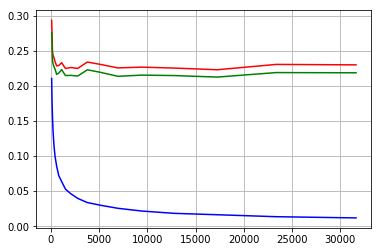

In [0]:
n_iter = 200
#n_list = np.arange(1, 1000, 50)
n_list = np.ceil(np.logspace(2, 4.5, 20)).astype(int)
# n_list = [50]
k = 5
c = 3
n_vects = int(np.minimum(N, c*k))
print '# of vectors: ', n_vects
print 'n_list: ', n_list
print

top_subspace = np.dot(U_star[:, 1:k+1], U_star[:, 1:k+1].T)

m = 50
errs = []
errs_weighted = []
errs_weighted_ = []
stds = []
stds_weighted = []
stds_weighted_ = []
for n in n_list:
    err = []
    err_weighted = []
    err_weighted_ = []
    for i in range(n_iter):
        UU_T, UU_T_weigthed, UU_T_weighted_ = weighted_cov_sum(original, n, m, N, d, rng, k, n_vects)
        U, _, _ = np.linalg.svd(UU_T)
        #print 'past SVD step'
        U_weighted, _, _ = np.linalg.svd(UU_T_weigthed)
        U_weighted_, _, _ = np.linalg.svd(UU_T_weighted_)
        err += [np.linalg.norm(top_subspace - np.dot(U[:, 1:k+1], U[:, 1:k+1].T), ord='fro')]
        err_weighted += [np.linalg.norm(top_subspace - np.dot(U_weighted[:, 1:k+1], U_weighted[:, 1:k+1].T), ord='fro')]
        err_weighted_ += [np.linalg.norm(top_subspace - np.dot(U_weighted_[:, 1:k+1], U_weighted_[:, 1:k+1].T), ord='fro')]
    errs += [np.mean(err)]
    errs_weighted += [np.mean(err_weighted)]
    errs_weighted_ += [np.mean(err_weighted_)]
    stds += [np.std(err)]
    stds_weighted += [np.std(err_weighted)]
    stds_weighted_ += [np.std(err_weighted_)]
    print 'n = ', n, ' done.'
    print 'err = ', np.mean(err), ', std = ', np.std(err)
    print 'err_weighted = ', np.mean(err_weighted), ', std_weighted = ', np.std(err_weighted)
    print 'err_weighted_ = ', np.mean(err_weighted_), ', std_weighted_ = ', np.std(err_weighted_)
    print

plt.plot(n_list, errs, c='r')
plt.plot(n_list, errs_weighted, c='g')
plt.plot(n_list, errs_weighted_, c='b')


plt.grid(which='both')
plt.show()

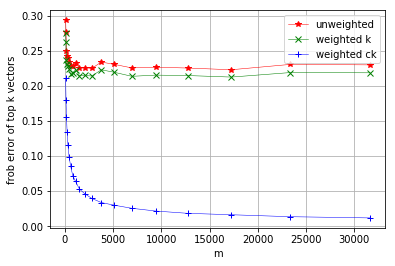

In [0]:
plt.plot(n_list, errs, c='r', lw=0.5, marker='*', label='unweighted')
plt.plot(n_list, errs_weighted, c='g', lw=0.5, marker='x', label='weighted k')
plt.plot(n_list, errs_weighted_, c='b', lw=0.5, marker='+', label='weighted ck')
plt.legend()

plt.xlabel('m')
plt.ylabel('frob error of top k vectors')

plt.grid(which='both')
plt.show()

In [0]:
plt.errorbar(n_list, errs, c='r')
plt.plot(n_list, errs_weighted, c='g')
plt.plot(n_list, errs_weighted_, c='b')


plt.legend()

plt.xlabel('n')
plt.ylabel('frob error of top k vectors')

plt.grid(which='both')
plt.show()